# DZ 1 Немного EDA для маркетинговых данных

Вам предложены данные iFood — приложения для доставки еды в Бразилии, представленного более чем в тысяче городов.
Поддержание высокой вовлеченности клиентов является важной задачей для компании. Для того, чтобы создавать новые предложения и проводить качественные рекламные кампании, необходимо понимать особенности и потребности целевой аудитории. Для этого были собраны данные о клиентах, использующих приложение. Вам предстоит выявить особенности людей, пользующихся данным приложением и найти интересные закономерности.

Почитать про компанию можно, например, на википедии:) https://en.wikipedia.org/wiki/IFood

Описание данных:
    
* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain - 1 if customer complained in the last 2 years
* DtCustomer - date of customer’s enrolment with the company
* Education - customer’s level of education
* Marital - customer’s marital status
* Kidhome - number of small children in customer’s household
* Teenhome - number of teenagers in customer’s household
* Income - customer’s yearly household income
* MntFishProducts - amount spent on fish products in the last 2 years
* MntMeatProducts - amount spent on meat products in the last 2 years
* MntFruits - amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - amount spent on wine products in the last 2 years
* MntGoldProds - amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalogue
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through company’s web site
* NumWebVisitsMonth - number of visits to company’s web site in the last month
* Recency - number of days since the last purchase

## Немного важной информации:

1. Обязательно гуглите! Использование дополнительных методов не карается, но приветствуется (если вы сможете объяснить принцип их работы) Однако, если вы нашли что-то полезное и хотите скопировать себе - сделав это, добавьте в начале ячейки ссылку на источник. В противном случае это будет считаться плагиатом.

2. Плагиат не допускается и строго наказывается. Единственное возможное исключение - код, заимствованный из интернета, с ссылкой на источник.

## Задание 1 (1 балл): предобработка данных

Откройте предложенные данные.

In [1]:
import pandas as pd
df = pd.read_csv("marketing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [2]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
#применим для того, чтобы в одном из заданий открывалась вся таблица

Изучите ваши данные. Какие типы данных здесь представлены? Все ли данные считались в корректном и удобном для работы формате? Если нет, то с какими данными есть проблемы?

In [3]:
df.shape #узнаем размер таблицы, чтобы понимать ее масштабность

(2240, 28)

у столбца Income тип данных не удобен для работы, так как не является количественным
Переменная Dt_Customer так же лучше перевести в другой формат, более удобный для восприятия
Все остальные данные считались в удобном формате

Теперь необходимо привести некоторые данные в корректный вид. Преобразуйте признак income так, чтобы значения этого признака были обычными вещественными числами (float)

In [4]:
df['Income']=df['Income'].str.replace('$','', regex=True) #regex добавляется для того, чтобы программа корркетно работала и не выдавала ошибки
df['Income']=df['Income'].str.replace(',','', regex=True) #убираем все знаки, чтобы можно было работать с цифрами
df['Income']=df['Income'].astype('float') #меняем тип данных
df['Income']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

Кроме того, даты нам было бы удобнее представить в корректном формате ГГГГ-ММ-ДД. Преобразуйте данные с датами в соответствующий вид.

In [5]:
def date(a):
    a = a.replace('/', '-')
    if a[1] != '-': #рассматриваем, что месяц состоит из 2 цифр, 10,11,12
        month = a[0]+a[1]
        if a[4] != '-': #день состоит из 2 цифр
            day=a[3]+a[4] 
            year = '20'+ a[6]+a[7]
        if a[4] == '-': #день из 1 цифры
            day='0' + a[3]
            year = '20'+ a[5]+a[6]
    if a[1] == '-': #месяц из 1 цифры
        month = '0' + a[0]
        if a[3] != '-': #дата из 2 цифр
            day=a[2]+a[3]
            year = '20'+ a[5]+a[6]
        if a[3] == '-': #дата из 1 цифры
            day='0'+ a[2]
            year = '20'+ a[4]+a[5]
    final_date = year + '-' + month + '-' + day
    return final_date
df['Dt_Customer'] = df['Dt_Customer'].apply(date)
print(df['Dt_Customer'])

#P.S очень надеюсь, что так странно это больше никто не решал

0       2014-06-16
1       2014-06-15
2       2014-05-13
3       2014-05-11
4       2014-04-08
           ...    
2235    2013-03-07
2236    2013-01-22
2237    2012-12-03
2238    2012-11-29
2239    2012-09-01
Name: Dt_Customer, Length: 2240, dtype: object


## Задание 2 (1.5 балла): пропуски и выбросы

Исследуйте данные на предмет пропусков и выбросов. Есть ли в данных пропуски? Сколько и в каких признаках? Как вы будете их обрабатывать? Обработайте пропуски, пояснив выбранную вами стратегию обработки.

_важно: просто удалить - это не стратегия обработки, придумайте что-то другое_

In [6]:
df.isnull().head() #так как таблица большая, мы не видим всех пропусков. Воспользуемся другой командой
df.isnull().sum() #теперь видно, что проуски есть только в одном столбике - income. 
df['Income'] = df['Income'].fillna(0) #Так как мы не можем предположить или найти в откртых источниках доход потребителя, заменим эти пропуски чем-то нейтральным
df['Income']=df['Income'].astype('float') #чтобы не менялся тип данных
df['Income']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

In [7]:
df.isnull().sum() #теперь пропусков 0 

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

Исследуйте данные на предмет выбросов и удалите их, если они есть. Если выбросы есть - продемонстрируйте это численно и с помощью визуализаций. Прокомментируйте, как вы ищете выбросы, и почему их стоит удалить.

1.Выбросы будут искаться при помощи построения боксплота, подсчета iqr и их дальнейшего удаления
2.Выбросы не будут удаляться по каждой категории, так как иначе останется слишком мало данных для дальнейшей работы
3.Будут проанализированы все выбросы по всем категориям товаров: вино, мясо, рыба, фрукты, сладости и gold продукты. Далее эти данные будут использоваться для построения графиков
4.Чтобы оставались строчки, необходимые для других заданий, выбросы будут удалены позже

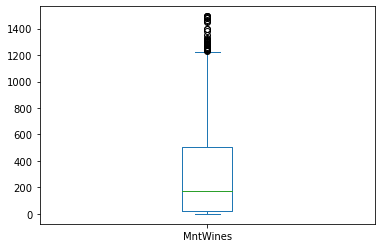

In [30]:
df['MntWines'].plot(kind='box'); # создаем боксплот, чтобы посмотреть на выбросы

In [31]:
import numpy as np
wine_q1 = df['MntWines'].quantile(.25)
wine_q3 = df['MntWines'].quantile(.75)
wine_iqr = wine_q3-wine_q1
wine_iqr

480.5

In [32]:
wine_pseudo_max = wine_q3 + 1.5 * wine_iqr
wine_pseudo_max

1225.0

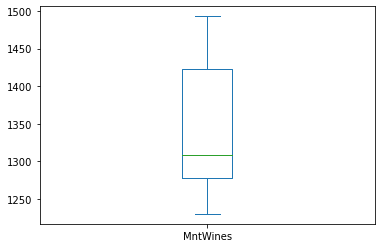

In [33]:
wine_max = 1225
df['MntWines'] = df['MntWines'].loc[df['MntWines'] > wine_max]
df['MntWines'].plot(kind='box');

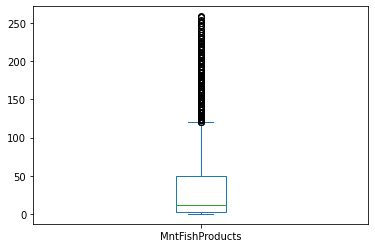

In [34]:
df['MntFishProducts'].plot(kind='box');

In [35]:
fish_q1 = df['MntFishProducts'].quantile(.25)
fish_q3 = df['MntFishProducts'].quantile(.75)
fish_iqr = fish_q3-fish_q1
fish_iqr

47.0

In [36]:
fish_pseudo_max = fish_q3 + 1.5 * fish_iqr
fish_pseudo_max

120.5

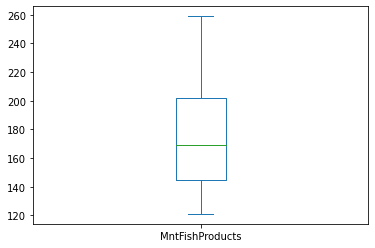

In [37]:
fish_max = 120.5
df['MntFishProducts'] = df['MntFishProducts'].loc[df['MntFishProducts'] > fish_max]
df['MntFishProducts'].plot(kind='box');

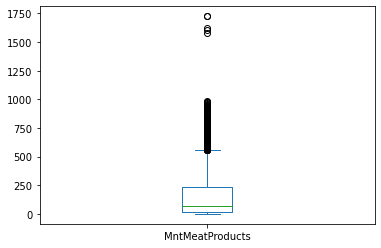

In [38]:
df['MntMeatProducts'].plot(kind='box');

In [39]:
meat_q1 = df['MntMeatProducts'].quantile(.25)
meat_q3 = df['MntMeatProducts'].quantile(.75)
meat_iqr = meat_q3-meat_q1
meat_iqr

216.0

In [40]:
meat_pseudo_max = meat_q3 + 1.5 * meat_iqr
meat_pseudo_max

556.0

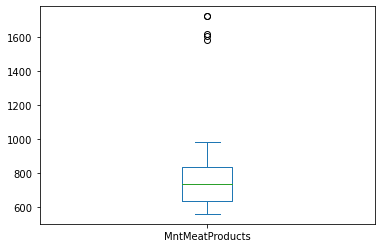

In [41]:
meat_max = 556.0
df['MntMeatProducts'] = df['MntMeatProducts'].loc[df['MntMeatProducts'] > meat_max]
df['MntMeatProducts'].plot(kind='box');

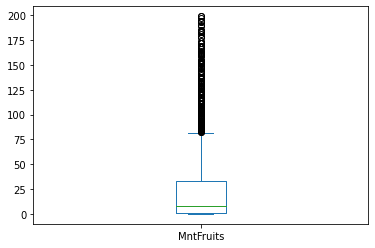

In [42]:
df['MntFruits'].plot(kind='box');

In [43]:
fruit_q1 = df['MntFruits'].quantile(.25)
fruit_q3 = df['MntFruits'].quantile(.75)
fruit_iqr = fruit_q3-fruit_q1
fruit_iqr

32.0

In [44]:
fruit_pseudo_max = fruit_q3 + 1.5 * fruit_iqr
fruit_pseudo_max

81.0

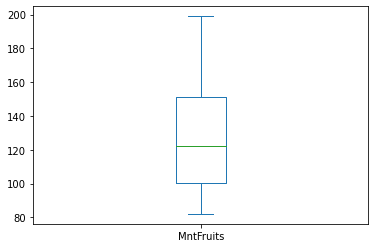

In [45]:
fruit_max = 81
df['MntFruits'] = df['MntFruits'].loc[df['MntFruits'] > fruit_max]
df['MntFruits'].plot(kind='box');

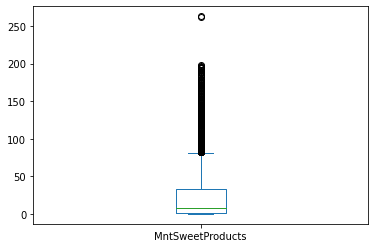

In [46]:
df['MntSweetProducts'].plot(kind='box');

In [47]:
sweet_q1 = df['MntSweetProducts'].quantile(.25)
sweet_q3 = df['MntSweetProducts'].quantile(.75)
sweet_iqr = sweet_q3-sweet_q1
sweet_iqr

32.0

In [48]:
sweet_pseudo_max = sweet_q3 + 1.5 * sweet_iqr
sweet_pseudo_max

81.0

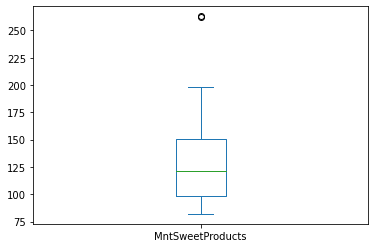

In [49]:
sweet_max = 81
df['MntSweetProducts'] = df['MntSweetProducts'].loc[df['MntSweetProducts'] > sweet_max]
df['MntSweetProducts'].plot(kind='box');

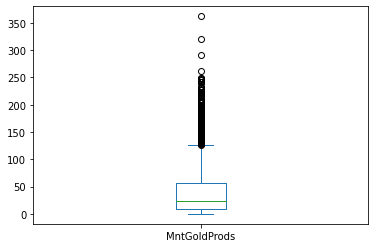

In [50]:
df['MntGoldProds'].plot(kind='box');

In [51]:
gold_q1 = df['MntGoldProds'].quantile(.25)
gold_q3 = df['MntGoldProds'].quantile(.75)
gold_iqr = gold_q3-gold_q1
gold_iqr

47.0

In [52]:
gold_pseudo_max = gold_q3 + 1.5 * gold_iqr
gold_pseudo_max

126.5

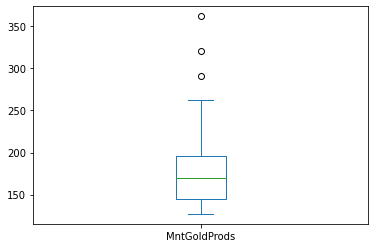

In [53]:
gold_max = 126.5
df['MntGoldProds'] = df['MntGoldProds'].loc[df['MntGoldProds'] > gold_max]
df['MntGoldProds'].plot(kind='box');

## Задание 3 (1 балл): новые признаки

Подумайте, какие осмысленные признаки можно создать из имеющихся? Придумайте как минимум 2 и добавьте их, содержательно описав, почему вы их добавляете и по какому принципу.

In [8]:
df['consumption'] = df['NumStorePurchases'] + df['NumWebPurchases']
df['consumption'] #общее потребление товаров, как онлайн, так и офлайн

0       10
1       14
2        8
3        3
4        5
        ..
2235    16
2236     4
2237    11
2238    15
2239    12
Name: consumption, Length: 2240, dtype: int64

Такой признак создается для понимания общего количества потребления, как онлайн, так и офлайн. Например, для исследования популярности того или иного товара, можно оценить все заказы. Совокупная таблица помогает также оценивать прибыльность компании, объединяя все покупки. В итоговой отчетности будет в первую очередь описано именно совокупное потребление, а потом уже из чего оно получилось.

In [9]:
df['children'] = df['Kidhome'] + df['Teenhome']
df['children']

0       0
1       0
2       1
3       2
4       1
       ..
2235    1
2236    1
2237    1
2238    0
2239    2
Name: children, Length: 2240, dtype: int64

Более удобная колонка, так как большое разницей между детьми и подростками нет. Наличие ребенка уже влияет на потенциальную рекламную кампанию, направленную на семьи или, например, матерей. Также хотя бы один малыш/подросток уже увеличивает спрос на те или иные товары (можно проверить, влияет ли количество детей на спрос на конфеты у потребителя). Такой признак может понадобиться для проверки зависимости между величиной потребления от одного ID и количеством детей в семье. Можно предположить, что чем больше детей в семье, тем больше они заказывают или покупают офлайн.

In [10]:
df['products'] = df['MntMeatProducts'] + df['MntFishProducts'] + df['MntFruits'] + df['MntSweetProducts'] + df['MntWines'] + df['MntGoldProds']
df['products']

0       1190
1        577
2        251
3         11
4         91
        ... 
2235     689
2236      55
2237     309
2238    1383
2239    1078
Name: products, Length: 2240, dtype: int64

Колонка, в которой отражено, колько всего каждый клиент потратил на те или иные продукты. Может помочь для определения платежеспособности потребителей, а также удобнее при анализе, который не учитывает различия каждого товара. Например, если изучается зависимость дохода потребителя от суммы денег, которые он тратит.

In [11]:
df['analytic'] = df['NumWebPurchases']/df['NumWebVisitsMonth']
df['analytic'] 

0       4.000000
1       1.400000
2       1.500000
3       0.142857
4       0.428571
          ...   
2235    1.250000
2236    0.125000
2237    0.750000
2238    1.666667
2239    1.142857
Name: analytic, Length: 2240, dtype: float64

Такая метрика может пригодиться для анализа воронки продаж. Например, сколько людей дойдет до осуществления покупки, так как зайти на сайт - это один из начальных шагов.(идет после формирования потребности и получения информации о существовании компании). Так компания сможет определить, сколько потенциальных клиентов она теряет и, опираясь на данные, изменить свою рекламную кампанию или позиционирование.

## Задание 4 (2.5 балла): время статистики!

Рассчитайте все описательные статистики для категориальных переменных (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!). Опишите, какие выводы вы можете сделать из полученных данных.

In [12]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,consumption,children,products,analytic
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2235.000000
mean,5592.159821,1968.805804,51687.459375,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,9.875000,0.950446,605.798214,inf
std,3246.662198,11.984069,25609.342730,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,5.231872,0.751803,602.249288,NaN
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,2828.250000,1959.000000,34722.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,68.750000,0.333333
50%,5458.500000,1970.000000,51075.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,396.000000,0.750000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,1.000000,1045.500000,1.500000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,27.000000,3.000000,2525.000000,inf


Выводы
1.Что интересно, в графе Year_Birth минимальным значением является 1893. Учитвая то, что остальные данные достаточно свежие, можно предположить, что человек ошибочно указал свою дату рождения, ошибшись во второй цифре, ну или это рекордный долгожитель 
2.В среднем потребители тратят на мясо больше денег, чем на рыбу. Стоит учесть предпочтения потребителей, как для рекламной кампании, так и для системы скидок, например. Также стоит заказывать больше мяса и меньше рыбы, так как спрос на первое выше, а второе может протухнуть
3.В среднем потребители делают перерывы между покупками и заказывают раз в месяц или даже реже, каждые 49 дней. Из этого следует, что клиент не нуждается в постоянном взаимодействии с компанией, а значит нужно повышать средний чек одного заказа, чтобы отсутсвие заказов на протяжении 49 дней не являлось убыточным
4.Есть потребитель, который совершил покупку через каталог целых 28 раз. Это интересное исключение из правил, так как в среднем потребители пользовались каталогом всего 2 раза. И этот факт уже стоит рассмотреть серьезно, так как неактуальность каталога также влияет на спрос. Возможно, его стоит либо улучшить, либо вообще убрать.
5.В среднем потребители посещают сайт компании 5 раз в месяц. Для компании доставки еды это достаточно хороший результат. Это значит, что клиенты пользуются сайтом раз в неделю.
6.Сайтом компании пользуются люди самого разного достатка. Доход клиентов сильно различается, значит и покупаемые ими товары тоже. Отсюда можно сделать вывод о разнообразной целевой аудитории, так как то, что можно рекламировать людям с высоким ежегодным доходом, будет неактуально для тех, кто не может себе это позволить

Рассчитайте все описательные статистики для количественных переменных.  (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!) Опишите, какие выводы вы можете сделать из полученных данных (хотя бы про какие-то 3 признака).

In [13]:
df.describe(include='object')

,Education,Marital_Status,Dt_Customer,Country
count,2240,2240,2240,2240
unique,5,8,663,8
top,Graduation,Married,2012-08-31,SP
freq,1127,864,12,1095


Выводы
1.Многие клиенты имеют только степень Graduation, то есть не получили степень магистра и аспиранта. Напрямую это не особо влияет на компанию, но данный факт все равно полезно учитывать при разработке маркетинговой кампании, а также при ценообразовании.
2.В таблице указаны всего 8 стран, что сильно сужает рынок для компании. В принципе такое количество стран является не плохим для компании, так как она уже вышла на международный рынок, однако в долгосрочной перспективе, компании следует развиваться и запускаться в других странах.
3.Большая часть потребителей женаты/замужем. Данный факт также сужает целевую аудитори компании, так как рекламные кампании можно строить на семейных ценностях, в том числе таргетируясь на детей или делая семейные аккаунты. Использование методов таргетирования на студентов (например скидки для студентов) будет менее актуальным.
4.Самая популярная страна проживания потребителя - Испания. Отсюда следует, что основные маркетинговые кампании должны быть направлены именно на испанских потребителей, так как именно они являются целевой аудиторией компании. При этом не стоит забывать и остальные страны, чтобы не потерять долю рынка в других странах.

Выберите 3 интересующих вас количественных признака и рассчитайте релевантные с вашей точки зрения описательные статистики для этих признаков, сгруппировав данные по семейному положению, образованию, стране. Какие закономерности вы можете отметить? Как их можно проинтерпретировать? 

In [14]:
df.groupby (['Marital_Status', 'Education', 'Country']).agg(['min', 'max', 'mean', 'median'])

ID                                \
                                     min    max          mean   median   
Marital_Status Education  Country                                        
Absurd         Graduation AUS       7734   7734   7734.000000   7734.0   
               Master     CA        4369   4369   4369.000000   4369.0   
Alone          Graduation CA          92     92     92.000000     92.0   
               Master     CA         433    433    433.000000    433.0   
               PhD        CA        7660   7660   7660.000000   7660.0   
Divorced       2n Cycle   AUS       3619   3619   3619.000000   3619.0   
                          CA         796   8726   5046.000000   5751.0   
                          GER      10033  10033  10033.000000  10033.0   
                          IND        607   7829   4218.000000   4218.0   
                          SA        2874   6357   4363.500000   4111.5   
                          SP        1627  10241   5496.555556   4756.0   
                          US       10507  10507  10507.000000  10507.0   
               Basic      CA        5342   5342   5342.000000   5342.0   
               Graduation AUS       2225  10430   7715.125000   9411.0   
                          CA         347  11100   5655.166667   6227.5   
                          GER        340   6147   3251.200000   3388.0   
                          IND       3712  10573   6668.400000   6168.0   
                          SA         380  10967   6063.518519   6409.0   
                          SP          22  11191   4955.277778   4806.5   
                          US         965   9977   5582.500000   5647.0   
               Master     AUS        437   6864   3311.000000   3421.0   
                          CA        1544  10524   4432.750000   2831.5   
                          IND        773   6983   3433.333333   2544.0   
                          SA        2565  10141   5614.285714   5320.0   
                          SP         590  10617   4629.866667   5154.0   
                          US        4096  10420   7565.333333   8180.0   
               PhD        AUS       2968  10010   6018.000000   5642.5   
                          CA        1461  10095   6047.200000   6299.0   
                          SA         252   9665   3407.666667   1665.0   
                          SP         531  10949   6310.214286   6220.0   
                          US        1071  10142   6029.500000   6452.5   
Married        2n Cycle   AUS       2802  10755   7822.000000   9909.0   
                          CA         367   9672   6683.250000   7620.5   
                          GER         20  10629   4812.909091   4915.0   
                          IND       1031   7725   4781.500000   5094.0   
                          SA          89  10995   4440.400000   1773.0   
                          SP         456  10681   5910.309524   5471.5   
                          US        2079   8779   5429.000000   5429.0   
               Basic      AUS       6516   6516   6516.000000   6516.0   
                          CA         642   4211   2166.333333   1646.0   
                          GER       1407   5802   3604.500000   3604.5   
                          IND       2563   2563   2563.000000   2563.0   
                          SA        4669   5692   5180.500000   5180.5   
                          SP         193   8312   4551.555556   5043.0   
                          US         387   1384    885.500000    885.5   
               Graduation AUS        793  10936   6386.333333   6223.0   
                          CA          25  11075   6215.000000   6919.5   
                          GER        221  10582   4827.708333   4951.5   
                          IND        326  11121   5302.517241   5462.0   
                          SA           0  11092   6607.615385   7016.5   
                          SP          35  11166   5273.967136   4954.0   
                          US         626  

Три количественных признака, по которым будут делаться выводы: Year_Birth, MntWines и Income
1.Именно вдовцы и чаще всего люди со степенью PhD являются одними из самых возрастных категорий. Достаточно логичный вывод,  так как PhD не получают в юном возрасте, а также вдовцами чаще всего являются пожилые люди, но интересно посмотреть на это в реальности. При этом есть люди, которые имеют начальное (относительно остальных приведенных в таблице) образование, при этом являясь достаточно зрелыми людьми
2.Практически все, кто проживает в Австралии, независимо от уровня образования или семеного положения имеют достаточно высокий ежегодный доход. Один из самых высоких по всем странам.
3.Что интересно, не удалось обнаружить прямой зависимости годового дохода от уровня образования. Казалось бы, что чем лучше у человека образование, тем выше будет его доход. Однако аспиранты не всегда выигрывают у людей, у которых нет высшего образования.
4.В Испании потребители тратят много денег на покупку вина, соответсвенно, его много пьют. Компания может подумать о специальных промоакциях для Испании на винную продукцию. Интересно еще заметить, что люди со статусом "вместе" и базовым образованием, покупают мало вина.
5.Минимальный ежегодный доход наблюдается в Испании, а максимальный - в Саудовской Аравии (если SA это она)
Бонусный вывод: Люди с PhD, которые написали в семейном положении YOLO (You Only Live Once) - главные шутники опросника

## Задание 5 (1 балл): корреляции

Найдите три самых сильных линейных взаимосвязи.Опишите, между какими признаками вы их нашли и содержательно проинтерпретируйте, почему (с вашей точки зрения) эти показатели связаны. 

_важно: необходимо вывести именно с помощью кода 3 пары самых сильно скоррелированных признака, а не искать их глазами в матрице корреляций_

In [14]:
df.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,consumption,children,products,analytic
ID,1.000000,0.000028,0.010378,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,-0.013438,-0.037166,-0.018924,-0.003440,-0.014927,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,-0.021968,0.033883,-0.019326,-0.000146,-0.018054,0.006021
Year_Birth,0.000028,1.000000,-0.154891,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.060846,-0.145040,-0.121275,-0.128272,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,0.021325,-0.030128,-0.156738,-0.090199,-0.111306,-0.104204
Income,0.010378,-0.154891,1.000000,-0.424723,0.015498,-0.010603,0.570851,0.421910,0.565318,0.431879,0.424761,0.312600,-0.081962,0.372397,0.579830,0.521456,-0.535452,-0.009682,0.174512,0.329995,0.267087,0.088132,0.136389,-0.024489,0.521805,-0.292937,0.654154,0.442638
Kidhome,0.002406,0.230176,-0.424723,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,-0.080008,0.040207,-0.502566,0.689971,-0.556669,-0.386225
Teenhome,-0.002580,-0.352111,0.015498,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,-0.154446,0.003138,0.114089,0.698433,-0.138384,-0.122791
Recency,-0.046524,-0.019871,-0.010603,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,-0.198437,0.013231,-0.005200,0.018053,0.020433,-0.029327
MntWines,-0.022878,-0.157773,0.570851,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,0.247254,-0.039007,0.686989,-0.351909,0.891839,0.395498
MntFruits,0.004600,-0.017917,0.421910,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,0.125289,-0.005166,0.444525,-0.394853,0.614229,0.386288
MntMeatProducts,-0.004437,-0.030872,0.565318,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,0.236335,-0.023483,0.454069,-0.502208,0.842965,0.469808
MntFishProducts,-0.024475,-0.041625,0.431879,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,0.111331,-0.020953,0.441720,-0.425503,0.642818,0.396804


<AxesSubplot:>

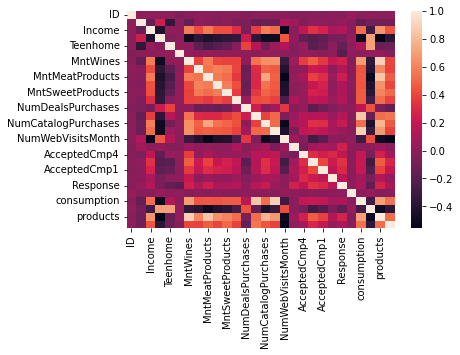

In [15]:
import seaborn as sns
sns.heatmap(df.corr(), annot=False)
#нам потребуются более светлые "квадратики", так как именно в них значения наиболее приближенны к 1
#будем искать линейные зависимости, а это значит, что она должна быть больше 0 и быть близкой к 1

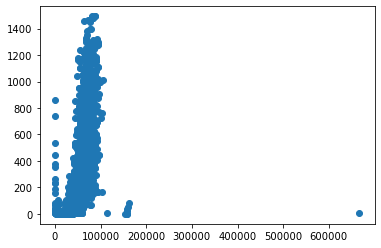

In [16]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
ax.scatter(df['Income'], df['MntWines']);

In [17]:
x = np.array(df['Income']) 
y = np.array(df['MntWines']) 
 
corr_result=np.corrcoef(x, y) 

print(corr_result)


[[1.         0.57085057]
 [0.57085057 1.        ]]


Существует достаточно выоская корреляция между доходом клиента и суммой, которую он потратил на покупку вина. Достаточно логично, так как алкоголь стоит дороже конфет или фруктов. А как мы увидим дальше, вино является одним из самых затратных товаров компании.

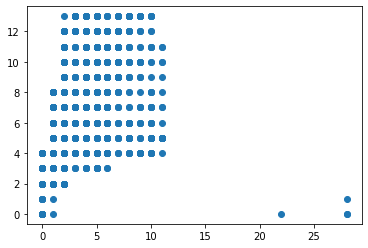

In [18]:
fig, ax = plt.subplots()
ax.scatter(df['NumCatalogPurchases'], df['NumStorePurchases']);

In [19]:
x = np.array(df['NumCatalogPurchases']) 
y = np.array(df['NumStorePurchases']) 
 
corr_result=np.corrcoef(x, y) 

print(corr_result)

[[1.         0.51873828]
 [0.51873828 1.        ]]


Также достаточно высокая корреляция между количеством покупок, сделанных с использованием каталога и количеством покупок, сделанных в офлайн магазине. Можно предположить, что сначала клиент смотрит каталог, а потом приходит в магазин, чтобы увидеть товар вживую и решить, будет ли он его покупать.

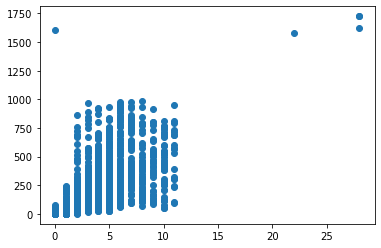

In [20]:
fig, ax = plt.subplots()
ax.scatter(df['NumCatalogPurchases'], df['MntMeatProducts']);

In [21]:
x = np.array(df['NumCatalogPurchases']) 
y = np.array(df['MntMeatProducts']) 
 
corr_result=np.corrcoef(x, y) 

print(corr_result)

[[1.         0.72382659]
 [0.72382659 1.        ]]


Самый светлый "квадрат", который показывает неочевидную корреляцию между количеством покупок через каталог и суммой, потраченной потребителями на покупку мяса. Возможно, такой результат получается от того, что мясо едят множество людей (за исключением вегетарианцев и веганов, которых все равно будет меньше) и практически каждый потребитель хоть раз покупал мясо. А каталог же предоставляет большой выбор, куда и заходит клиент, чтобы купить еду.

## Задание 6 (2 балла) : визуализации

Придумайте и постройте как минимум 6 содержательных визуализаций, которые будут иллюстрировать те или иные выводы, которые вы сделали на основе данных. К каждой визуализации должна прилагаться содержательная текстовая интерпретация. Каждая визуализация должна быть грамотно оформлена, с соблюдением всем правил. Необходимо задействовать не менее 4 типов диаграмм. 

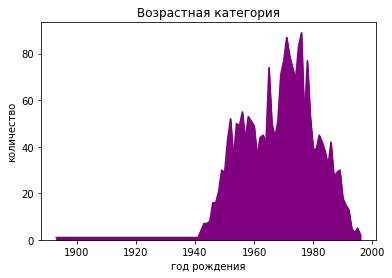

In [22]:
df.groupby('Year_Birth').Response.count().plot(kind='area', title = 'Возрастная категория', color = 'purple', xlabel = 'год рождения', ylabel = 'количество');

Благодаря такому графику можно посмотреть самый популярный год рождения у клиентов компании. А значит, в дальнейшем сделать выводы о среднем возрасте потребителя и настраивать  рекламную кампанию именно под этот возраст. Здесь можно заметить, что большинство потребителей родились в промежутке с 1960 по 1980. А значит, что это уже достаточно зрелые люди, у которых могут быть семья, дети, постоянная работа и состоявшаяся жизнь. Эти факторы важно учитывать при планировании дальнейшего продвижения компании.(Некоторые из них могут просто не понять черезчур "молодежный сленг")

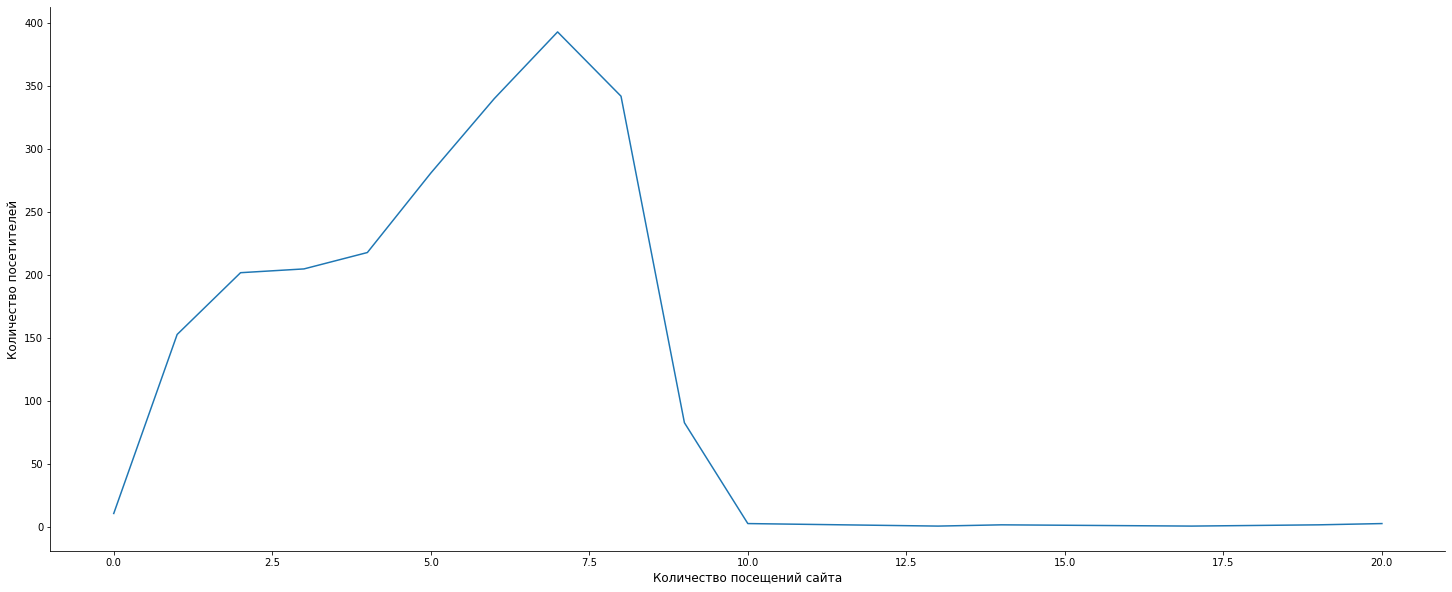

In [23]:
ig, ax = plt.subplots(1,1, figsize=(25,10)) 
df.groupby('NumWebVisitsMonth').Response.count().plot(kind='line')
ax.set_xlabel('Количество посещений сайта', fontsize=12)
ax.set_ylabel('Количество посетителей', fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Благодаря графику можно заметить, что в большинстве потребители посещают онлайн-магазин 6-7 раз в месяц. Также большое количество людей заходят на сайт всего 1 или 3 раза. Единицы делают это больше 10 раз.Можно сделать вывод, что в многие потребители достаточно часто заходят на сайт, что однозначно повышает конверсии сайту и поднимают его в поисковике (SEO - продвижение).

In [24]:
df['fish'] = df['MntFishProducts'].sum()
df['meat'] = df['MntMeatProducts'].sum()
df['fruits'] = df['MntFruits'].sum()
df['sweet'] = df['MntSweetProducts'].sum()
df['wine'] = df['MntWines'].sum()
df['gold'] = df['MntGoldProds'].sum() 
print(df['fish'][0],df['meat'][0],df['fruits'][0],df['sweet'][0],df['wine'][0],df['gold'][0] )

84057 373968 58917 60621 680816 98609


Для следующего графика нужно получить сумму по каждому продукту, т.е на сколько долларов покупались продукты. Таким образом, мы получим самую затратную категорию.

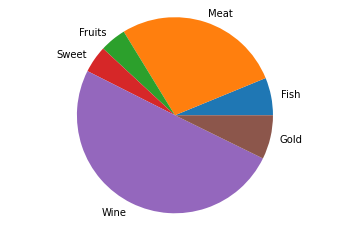

In [25]:
labels = ['Fish','Meat','Fruits','Sweet','Wine','Gold']
values = [84057, 373968, 58917, 60621, 680816, 98609]
plt.pie(values,labels=labels,)
plt.axis('equal')
plt.show()
# код был подсмотрен тут:https://pythobyte.com/plot-customize-pie-chart-in-python-76899/? и преобразован

Можно сделать вывод, что больше всего тратят на вино, на втором месте мясо, а наименьшее количество тратится на конфеты. Самые затратные категории достаточно логичны, так как алкоголь и мясо практически в любом чеке будут одними из самых затратных категорий. Соответственно, именно эти два товара являются самыми прибыльными для компании, которая может настраивать маркетинг так, чтобы люди покупали еще больше товаров из этой категории.

Text(0, 0.5, 'children')

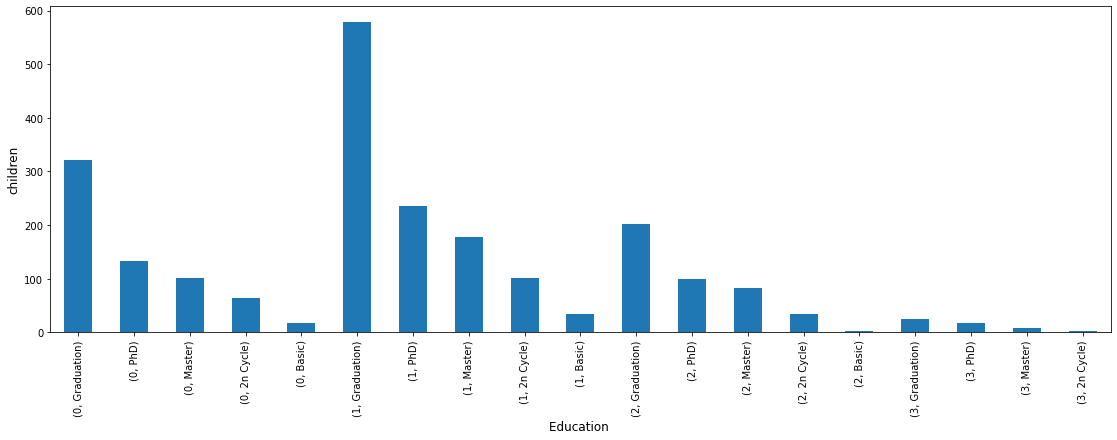

In [26]:
fig, ax = plt.subplots(1,1, figsize=(19,6)) 
df.groupby(['children'])['Education'].value_counts().plot(kind='bar')
ax.set_xlabel('Education ', fontsize=12)
ax.set_ylabel('children', fontsize=12)

Интересно посмотреть, как уровень образования влияет на количество детей. Существует множество предрассудков относительно этого вопроса. Но данный график в некотором роде их подтверждает. Больше всего детей у людей, которые получили школьное образование. А меньше всего у аспирантов и магистров. На маркетинговую кампанию это не влияет, так как таргетироваться на уровень образования будучи приложением для доставки еды - странно и нерелевантно.

<AxesSubplot:title={'center':'Распределение по странам'}>

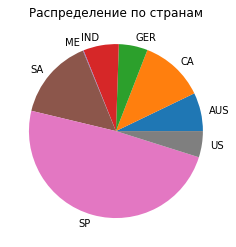

In [27]:
df.groupby('Country').size().plot(kind='pie', title = 'Распределение по странам', ylabel = '')

Благодаря такому графику, мы можем определить, в какой стране живут больше всего клиентов компании. Можно сделать вывод, что практически 50% потребителей проживают в Испании. Компания должна понимать, где проживают большинство ее потребителей, чтобы знать, где, во-первых, расположить офисы компании, а во-вторых, как проводить маркетинговые кампании, чтобы они были успешны. Удивительно, что у Бразильской компании нет Бразилии.

In [28]:
def year(a):
    final_year = a[0] + a[1] + a[2] + a[3] 
    return final_year
df['year'] = df['Dt_Customer'].apply(year)
df['year']
#небольшая фукнция для того, чтобы "вытащить" из даты епрвого взаимодействия с компанией именно год.

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
2235    2013
2236    2013
2237    2012
2238    2012
2239    2012
Name: year, Length: 2240, dtype: object

Text(0, 0.5, 'Количество человек')

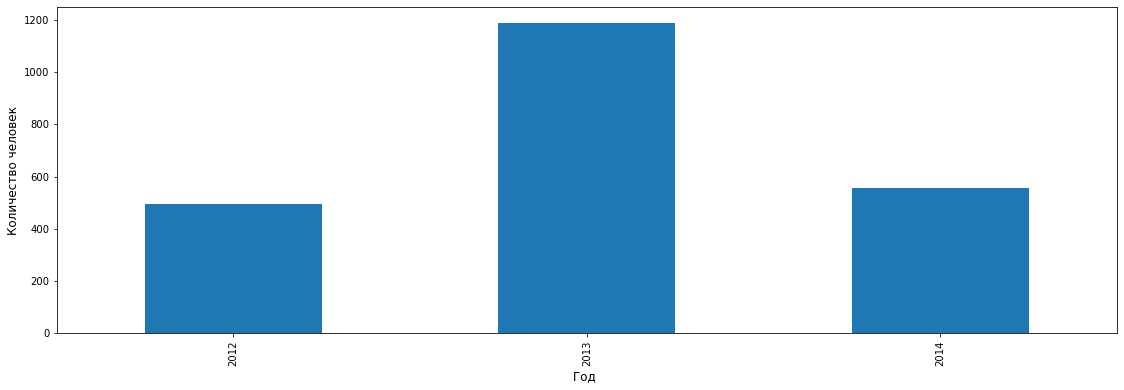

In [29]:
fig, ax = plt.subplots(1,1, figsize=(19,6)) 
df.groupby('year').ID.count().plot(kind='bar');
ax.set_xlabel('Год ', fontsize=12)
ax.set_ylabel('Количество человек', fontsize=12)

На данном графике видно, в каком году сколько покупателей совершили свою первую покупку, то есть первое взаимодействие с компанией. Самым популярным годом оказался 2013. Интересно отметить, что в 2014 году количество новых покупателей сократилась практически вдвое. Это плохо для прибыльности и развития компании и свидетельствует о неграмотной маркетинговой кампании. По-хоррошему, каждый год количество новых пользователей должно увеличиваться или хотя бы оставаться на прежнем уровне. То, что 2014 год едва больше 2012 опасно и явно показывает компании, что ей нужно работать над увеличением популярности и осведомленности о компании, чтобы к ней приходили новые клиенты.

## Задание 7 (1 балл): немного исследований

Попробуйте найти в данных какую-то классную интересную особенность. Может быть, рыбу едят только неженатые? Или самый большой заработок и потребление фруктов у людей без образования? Приведите все расчеты, и визуализации для обнаруженного факта. Он должен быть правда интересным и удивлять! Попробуйте описать, почему (как вам кажется) так получилось.

В задании 4 в пункте 3 была достаточно большая таблица, в которой можно было заметить много интересного. Рассмотрим сле